In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import gc
import nltk
nltk.download('stopwords')
import math

from smart_open import open
from nltk.corpus import stopwords
import sklearn
from sklearn.metrics import classification_report
from keras.layers import Dropout
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from gensim.models.keyedvectors import KeyedVectors

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras import layers


from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Text + Audio
from tensorflow.keras import layers

class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)
    # self.W_T = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1),trainable=True)
    # self.b_T = tf.Variable(tf.constant(-1.0, shape=[n_data_points, n_sentences, n_features]),trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)
    # self.W = tf.Variable(tf.random.truncated_normal([n_data_points,n_features, n_features], stddev=0.1), trainable=True)
    # self.b = tf.Variable(tf.constant(0.1, shape=[n_data_points, n_sentences, n_features]), trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [ ]:
# Multiple Inputs
class Text_Audio:
  # first input model
  input1 = Input(shape=(250,74), name = 'Audio_input')
  highway1 = Highway()(input1)
  highway5 = Highway()(highway1)
  highway6 = Highway()(highway5)
  dense1 = Dense(74)(highway6)

  input3 = Input(shape = (250,5100), name = 'Text_input')
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  dense6 = Dense(250)(dense5)
  dense3 = Dense(74)(dense6)
  # merge input models
  merge = concatenate([dense1,dense3], axis = 1)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=[input1, input3], outputs=output)
  # summarize layers
  print(model.summary())
  # plot graph
  plot_model(model)
  optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
  def run_model(self):
    self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy')

    return self.model



/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Audio_input (InputLayer)       [(None, 250, 74)]    0           []                               
                                                                                                  
 Text_input (InputLayer)        [(None, 250, 5100)]  0           []                               
                                                                                                  
 highway (Highway)              (None, 250, 74)      47952       ['Audio_input[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 250, 1000)    5101000     ['Text_input[0][0]']             
                                                                                              

In [ ]:
#Text+Video


class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [ ]:
class Text_Video:
  # second input model
  input2 = Input(shape=(250,388), name = 'Video_input')
  highway2 = Highway()(input2)
  highway3 = Highway()(highway2)
  highway4 = Highway()(highway3)
  # dense7 = Dense(200)(highway4)
  dense2 = Dense(250)(highway4)

  input3 = Input(shape = (250,5100), name = 'Text_input')
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  # dense6 = Dense(250)(dense5)
  dense3 = Dense(250)(dense5)
  # merge input models
  merge = concatenate([dense2,dense3], axis = 1)
  # interpretation model
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=[input2, input3], outputs=output)
  # summarize layers
  print(model.summary())
  # # plot graph
  plot_model(model)
  def run_model(self):
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    self.model.compile(optimizer=optimizer, loss='binary_crossentropy')
    return self.model



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Video_input (InputLayer)       [(None, 250, 388)]   0           []                               
                                                                                                  
 highway_3 (Highway)            (None, 250, 388)     495088      ['Video_input[0][0]']            
                                                                                                  
 Text_input (InputLayer)        [(None, 250, 5100)]  0           []                               
                                                                                                  
 highway_4 (Highway)            (None, 250, 388)     495088      ['highway_3[0][0]']              
                                                                                            

In [ ]:
#Text+Audio+Video

class Highway(layers.Layer):

  def __init__(self):
    super(Highway, self).__init__()

  def build(self, input_shape):
    n_sentences = input_shape[1]
    n_features = input_shape[2]
    carry_bias = keras.initializers.Constant(value=-1.0)
    random_dist = keras.initializers.RandomNormal(mean=0.0, stddev=0.1)

    carry_bias_2 = keras.initializers.Constant(value= 0.1)

    self.W_T = self.add_weight(shape=(n_features, n_features),initializer = random_dist,trainable=True)
    self.b_T = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias, trainable=True)

    self.W = self.add_weight(shape=( n_features, n_features),initializer = random_dist, trainable=True)
    self.b = self.add_weight(shape=( n_sentences, n_features),initializer = carry_bias_2, trainable=True)


  def call(self, inputs):
    x = inputs
    T = tf.sigmoid(tf.matmul(x, self.W_T) + self.b_T, name="transform_gate")
    H = tf.nn.relu(tf.matmul(x, self.W) + self.b, name="activation")
    C = tf.subtract(1.0, T, name="carry_gate")

    return tf.add(tf.multiply(H, T), tf.multiply(x, C), "y")


In [ ]:
class Text_Video_Audio:
  # first input model
  input1 = Input(shape=(250,74), name = 'Audio_input')
  highway1 = Highway()(input1)
  highway5 = Highway()(highway1)
  highway6 = Highway()(highway5)
  dense1 = Dense(74)(highway6)

  # second input model
  input2 = Input(shape=(250,388), name = 'Video_input')
  highway2 = Highway()(input2)
  highway3 = Highway()(highway2)
  highway4 = Highway()(highway3)
  dense7 = Dense(200)(highway4)
  dense2 = Dense(74)(dense7)

  input3 = Input(shape = (250,5100), name = 'Text_input')
  dense4 = Dense(1000)(input3)
  dense5 = Dense(500)(dense4)
  dense6 = Dense(250)(dense5)
  dense3 = Dense(74)(dense6)
  # merge input models
  merge = concatenate([dense1,dense2,dense3], axis = 1)
  lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)(merge)
  # bidire = Bidirectional(lstm)
  output = Dense(1, activation='sigmoid')(lstm)
  model = Model(inputs=[input1, input2, input3], outputs=output)
  def run_model(self):

    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    self.model.compile(optimizer=optimizer, loss='binary_crossentropy')
    return self.model




In [ ]:
dev_location = "dev_data"
test_location = "test_data"
train_location = "train_data"

devData = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/dev_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
testData = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/full_test_split.csv',delimiter=',',encoding='utf-8'))[:, 0:2]
trainData = np.array(pd.read_csv('/content/drive/MyDrive/Dataset/train_split_Depression_AVEC2017.csv',delimiter=',',encoding='utf-8'))[:, 0:2]


dataset = np.concatenate((devData, np.concatenate((testData, trainData))))

gc.collect()

2550

In [ ]:
max_num_words = 17
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)
stop_words = set(stopwords.words('english'))



In [ ]:
def checkDataPointExistence(patientID, split):
  for i in split:
    if(patientID == i[0]):
      return True
  return False


In [ ]:
def getData(patientID, location):
  # print("PatientID: " + str(int(patientID)))
  retData = [int(patientID)]
  textD = getTextData(patientID, location)
  audioD = getAudioData(patientID, location, textD)
  videoD = getVideoData(str(int(patientID)), location, textD)
  # patientD = np.concatenate((textD, audioD, videoD), axis = 1)
  # print("Final Patient Data: " + str(patientD.shape))
  return textD,audioD,videoD

In [ ]:
def getTextData(patientID, location):
  fileName = "/content/drive/MyDrive/Dataset_Extracted/"+ str(location) + "/" + str(int(patientID)) + "_TRANSCRIPT.csv"
  file = np.array(pd.read_csv(fileName,delimiter='\t',encoding='utf-8', engine='python'))

  # Remove All Utterences By Ellie:
  for i in range(len(file)):
    if(file[i][2] != 'Participant'):
      np.delete(file, i)
      i-=1

  # Remove Speaker Columnn
  file = np.delete(file, 2, 1)

  # Convert Text Into Word Vectors:
  w2vs = np.zeros((1, max_num_words*300))
  for i in range(len(file)):
    sentence = file[i][2]
    w2v = returnWordToVec(sentence)
    w2vs = np.concatenate((w2vs, w2v), axis = 0)
  w2vs = np.delete(w2vs, 0, 0)

  # Delete Sentences and Replace With W2Vs
  file = np.delete(file, 2, 1)
  file = np.concatenate((file, w2vs), axis = 1)
  return file



In [ ]:
def remove_StopWords(sentence):
    filtered_sentence = []
    for w in sentence:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

In [ ]:
def returnWordToVec(sentence):
  global max_num_words, stop_words, model
  sentence = str(sentence).split(" ")
  sentence = remove_StopWords(sentence)
  index_word = 0
  wordMatrix = np.zeros(max_num_words*300)
  for j in range(min(max_num_words, len(sentence))):
    try:
      word = sentence[j]
      if(word[0] == '<'):
        if(word.find('>')!=-1):
          word = word[1:-1]
        else:
          word = word[1:]
      else:
        if(word.find('>')!=-1):
          word = word[0:-1]
      ss = np.array(model[word])
      wordMatrix[index_word*300:(index_word+1)*300] = ss
      index_word+=1
    except Exception as e:
      continue
  wordMatrix = np.array(wordMatrix.reshape(1,-1))
  return wordMatrix


In [ ]:
def audioDataHelper(X):
    for i in range(X.shape[0]):
        if(X[i,1] == 0):
            X[i,0] = 0
            for j in range(7):
                X[i,j+1] = 0
    X = np.array(X)
    return X

In [ ]:
def getAudioData(patientID, location, textD):
  fileName = "/content/drive/MyDrive/Dataset_Extracted/"+ str(location) + "/" + str(int(patientID)) + "_COVAREP.csv"
  data = pd.read_csv(fileName,header = None)
  data = data.iloc[:,:].values
  data = audioDataHelper(data)
  # print("Audio Raw Data:" + str(data.shape))
  sentenceDatas = []
  for sentence in textD:
    sentenceStartime = sentence[0]
    sentenceEndTime = sentence[1]
    startIndex = math.floor(sentenceStartime/0.01)
    endIndex = math.ceil(sentenceEndTime/0.01)
    # print("Start Time: " + str(startIndex))
    # print("End Time: " + str(endIndex))
    sentenceData = data[startIndex: endIndex]
    sentenceData = np.average(sentenceData, axis = 0)
    # This might be a possible error
    sentenceData = np.array(sentenceData.reshape(1, -1))
    sentenceDatas.append(sentenceData)

  sentenceDatas = np.array(sentenceDatas)
  sentenceDatas = np.reshape(sentenceDatas, (textD.shape[0],-1))
  # print("Audio Final Data:" + str(sentenceDatas.shape))

  return sentenceDatas

In [ ]:
def getVideoDataHelper(patientID, location):
  root = "/content/drive/MyDrive/Dataset_Extracted/"+ str(location) + "/"
  file1 = root + (patientID)+"_CLNF_AUs.txt"
  file2 = root + (patientID)+"_CLNF_features.txt"
  file3 = root + (patientID)+"_CLNF_features3D.txt"
  file4 = root + (patientID)+"_CLNF_gaze.txt"
  file5 = root + (patientID)+"_CLNF_hog.txt"
  file6 = root + (patientID)+"_CLNF_pose.txt"
  data = processVideoData(file1)
  data = np.concatenate((data, processVideoData(file2)), 1)
  data = np.concatenate((data, processVideoData(file3)), 1)
  data = np.concatenate((data, processVideoData(file4)), 1)
  data = np.concatenate((data, processVideoData(file6)), 1)
  # print("Video Raw Data:" + str(data.shape))
  return data

In [ ]:
def processVideoData(filename):
  try:
    data = pd.read_csv(filename,delimiter=',', dtype=float)
    X = data.iloc[:,:].values
    X = np.delete(X, 0, 1)
    X = np.delete(X, 1, 1)
  except:
    # print("Video Data corrupt, fixing.")
    data = pd.read_csv(filename,delimiter=',')
    X = data.iloc[:,:].values
    X = np.delete(X, 0, 1)
    X = np.delete(X, 1, 1)
    for i in range(len(X)):
        if(isinstance(X[i][5],str) or isinstance(X[i][7],str)):
            X[i] = np.zeros((1, X.shape[1]))
            # print("se" , end = " ")
  return X

In [ ]:
def getVideoData(patientID, location, textD):
  data = getVideoDataHelper(patientID, location)
  sentenceDatas = []
  for sentence in textD:
    sentenceStartime = sentence[0]
    sentenceEndTime = sentence[1]
    startIndex = math.floor(sentenceStartime/0.333)
    endIndex = math.ceil(sentenceEndTime/0.333)
    # print("Start Time: " + str(startIndex))
    sentenceData = data[startIndex: endIndex]
    sentenceData = np.average(sentenceData, axis = 0)
    # This might be a possible error
    sentenceData = np.array(sentenceData.reshape(1, -1))
    sentenceDatas.append(sentenceData)

  sentenceDatas = np.array(sentenceDatas)
  sentenceDatas = np.reshape(sentenceDatas, (textD.shape[0],-1))
  # print("Video Final Data:" + str(sentenceDatas.shape))
  return sentenceDatas


In [ ]:
# Xtrain = []
Ytrain = []
# Xtest = []
Ytest = []


audio_train = []
video_train = []
text_train = []

audio_test = []
video_test = []
text_test = []




In [ ]:
for datapoint in dataset:
  # print(datapoint[0])
  if(checkDataPointExistence(datapoint[0], devData)):

    # Data Point in Dev Set
    text,audio,video = getData(datapoint[0], dev_location)
    audio_train.append(audio)
    video_train.append(video)
    text_train.append(text)
    # Xtest.append(data)
    Ytrain.append(datapoint[1])
    # print(data)
  elif(checkDataPointExistence(datapoint[0], testData)):
    # Data Point in Test Set
    text,audio,video = getData(datapoint[0], test_location)
    audio_test.append(audio)
    video_test.append(video)
    text_test.append(text)
    # Xtest.append(data)
    Ytest.append(datapoint[1])
  elif(checkDataPointExistence(datapoint[0], trainData)):
    # Data Point in Train Set
    text,audio,video = getData(datapoint[0], train_location)
    audio_train.append(audio)
    video_train.append(video)
    text_train.append(text)
    # Xtest.append(data)
    Ytrain.append(datapoint[1])

<ipython-input-19-4ddb554e8581>:9: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename,delimiter=',')
<ipython-input-19-4ddb554e8581>:9: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,

In [ ]:
def refactor(arr, size):
  arrsize = arr.shape[0]
  temp = np.zeros((size, arr.shape[1]))
  for i in range(min(len(arr), size)):
    temp[i] = arr[i]
  return temp

In [ ]:
numberOfSentences = 250

devData = []
trainData = []
testData = []
gc.collect()

for i in range(len(audio_train)):
  audio_train[i] = refactor(audio_train[i], numberOfSentences)
  video_train[i] = refactor(video_train[i], numberOfSentences)
  text_train[i] = refactor(text_train[i], numberOfSentences)
  # print(Xtrain[i].shape)


In [ ]:
for i in range(len(audio_test)):
  audio_test[i] = refactor(audio_train[i], numberOfSentences)
  video_test[i] = refactor(video_train[i], numberOfSentences)
  text_test[i] = refactor(text_train[i], numberOfSentences)
  # print(Xtest[i].shape)
audio_test = np.array(audio_test)
video_test = np.array(video_test)
text_test = np.array(text_test)
text_test = text_test[:,:,2:]

audio_train = np.array(audio_train)
video_train = np.array(video_train)
text_train = np.array(text_train)
text_train = text_train[:,:,2:]


dataset = []
gc.collect()

print(audio_test.shape,video_test.shape,text_test.shape)
print(audio_train.shape,video_train.shape,text_train.shape)
# print(audio_dev.shape,video_dev.shape,text_dev.shape)


(47, 250, 74) (47, 250, 388) (47, 250, 5100)
(142, 250, 74) (142, 250, 388) (142, 250, 5100)


In [ ]:
Ytrain = np.array(Ytrain)
Ytest = np.array(Ytest)

In [ ]:
import sklearn
from sklearn import preprocessing


def upsample(X_train,Y_train):
  X_train_0 = X_train[Y_train==0]
  X_train_1 = X_train[Y_train==1]

  Y_train_1 = Y_train[Y_train==1]
  # print(Y_train_1.shape)
  # print(X_train_1.shape)
  size = X_train_0.shape[0] - X_train_1.shape[0]
  X = []
  Y = []
  X_train = list(X_train)
  Y_train = list(Y_train)
  while(size>0):
    size -= 1
    index = np.random.randint(0,X_train_1.shape[0]-1)
    leave_index = np.random.randint(0,len(X_train)-1)
    X_add = X_train_1[index]
    X_leave = X_train[leave_index]

    Y_add = Y_train_1[index]
    Y_leave = Y_train[leave_index]

    X_train[leave_index] = X_add
    X_train.append(X_leave)

    Y_train[leave_index] = Y_add
    Y_train.append(Y_leave)


  X_train = np.array(X_train)
  Y_train = np.array(Y_train)
  return X_train,Y_train


In [ ]:
audio_train = np.nan_to_num(audio_train)
video_train = np.nan_to_num(video_train)
text_train = np.nan_to_num(text_train)

audio_train, _ = upsample(audio_train,Ytrain)
video_train, _ = upsample(video_train,Ytrain)
text_train, Ytrain = upsample(text_train,Ytrain)

print(audio_train.shape)
print(video_train.shape)
print(text_train.shape)
print(Ytrain.shape)

(200, 250, 74)
(200, 250, 388)
(200, 250, 5100)
(200,)


In [ ]:
for i in range(audio_train.shape[0]):
  audio_train[i] = sklearn.preprocessing.normalize(audio_train[i])
  video_train[i] = sklearn.preprocessing.normalize(video_train[i])
  text_train[i] = sklearn.preprocessing.normalize(text_train[i])

print(Ytest.shape)

audio_test = np.nan_to_num(audio_test)
video_test = np.nan_to_num(video_test)
text_test = np.nan_to_num(text_test)


(47,)


In [ ]:
for i in range(audio_test.shape[0]):
  audio_test[i] = sklearn.preprocessing.normalize(audio_test[i])
  video_test[i] = sklearn.preprocessing.normalize(video_test[i])
  text_test[i] = sklearn.preprocessing.normalize(text_test[i])


In [1]:
def Thresholding(Y_pred, threshold):
  Y_pred2 = []
  print("Y_pred: ", Y_pred.shape)
  for i in range(len(Y_pred)):
    if(Y_pred[i] < threshold):
      Y_pred2.append(0)
    else:
      Y_pred2.append(1)

  return np.array(Y_pred2)

gc.collect()


32

In [ ]:
print("--------------------------------------AUDIO + TEXT (W GATING) SENTENCE LEVEL-------------------------------------------------")
model1 = Text_Audio()
model = model1.run_model()

model.fit([audio_train,text_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
        baseline=None, restore_best_weights=True),epochs=50, batch_size = 137)



--------------------------------------AUDIO + TEXT (W GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/50
2/2 [==============================] - 12s 2s/step - loss: 0.6925 - val_loss: 0.6950
Epoch 2/50
2/2 [==============================] - 3s 1s/step - loss: 0.6884 - val_loss: 0.6967
Epoch 3/50
2/2 [==============================] - 3s 1s/step - loss: 0.6854 - val_loss: 0.6995
Epoch 4/50
2/2 [==============================] - 3s 1s/step - loss: 0.6819 - val_loss: 0.7033
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 0.6799 - val_loss: 0.7068
Epoch 6/50
2/2 [==============================] - 3s 1s/step - loss: 0.6767 - val_loss: 0.7084
Epoch 7/50
2/2 [==============================] - 3s 1s/step - loss: 0.6736 - val_loss: 0.7087
Epoch 8/50
2/2 [==============================] - 3s 1s/step - loss: 0.6690 - val_loss: 0.7094
Epoch 9/50
2/2 [==============================] - 3s 1s/step - loss: 0.6653 - val_loss: 0.7103
Epoch 10/50
2/2 [=

2/2 [==============================] - 1s 151ms/step
Y_pred:  (47, 1)


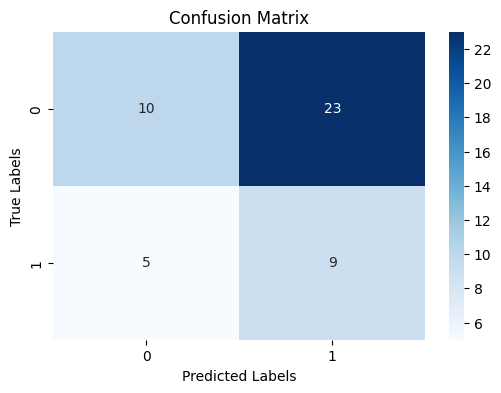

Confusion Matrix:
[[10 23]
 [ 5  9]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Threshold the predictions using the Thresholding function with threshold 0.5
threshold = 0.5
pred = model.predict([audio_test,text_test])
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.30      0.42        33
         1.0       0.28      0.64      0.39        14

    accuracy                           0.40        47
   macro avg       0.47      0.47      0.40        47
weighted avg       0.55      0.40      0.41        47



In [ ]:
print("--------------------------------------VIDEO + TEXT (W GATING) SENTENCE LEVEL-------------------------------------------------")
model2 = Text_Video()
model = model2.run_model()

model.fit([video_train,text_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
        baseline=None, restore_best_weights=True),epochs=50, batch_size = 137)



--------------------------------------VIDEO + TEXT (W GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/50
2/2 [==============================] - 13s 3s/step - loss: 0.6927 - val_loss: 0.6955
Epoch 2/50
2/2 [==============================] - 4s 1s/step - loss: 0.6876 - val_loss: 0.6978
Epoch 3/50
2/2 [==============================] - 5s 1s/step - loss: 0.6820 - val_loss: 0.6989
Epoch 4/50
2/2 [==============================] - 4s 1s/step - loss: 0.6784 - val_loss: 0.7009
Epoch 5/50
2/2 [==============================] - 4s 1s/step - loss: 0.6733 - val_loss: 0.7040
Epoch 6/50
2/2 [==============================] - 4s 1s/step - loss: 0.6686 - val_loss: 0.7075
Epoch 7/50
2/2 [==============================] - 4s 1s/step - loss: 0.6645 - val_loss: 0.7097
Epoch 8/50
2/2 [==============================] - 4s 1s/step - loss: 0.6593 - val_loss: 0.7091
Epoch 9/50
2/2 [==============================] - 4s 1s/step - loss: 0.6528 - val_loss: 0.7087
Epoch 10/50
2/2 [=

2/2 [==============================] - 1s 122ms/step
Y_pred:  (47, 1)


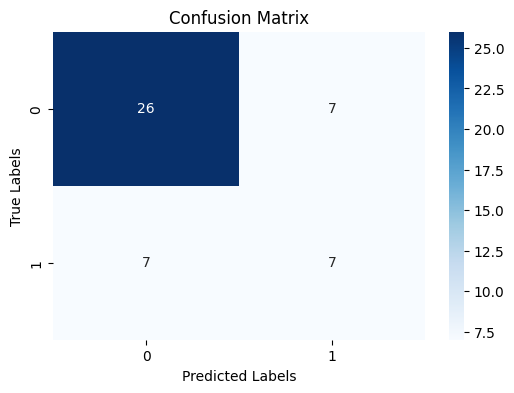

Confusion Matrix:
[[26  7]
 [ 7  7]]


In [ ]:
threshold = 0.5
pred = model.predict([video_test,text_test])
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        33
         1.0       0.50      0.50      0.50        14

    accuracy                           0.70        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.70      0.70      0.70        47



In [ ]:
print("--------------------------------------AUDIO + VIDEO + TEXT (W GATING) SENTENCE LEVEL-------------------------------------------------")
model3 = Text_Video_Audio()
model = model3.run_model()

model.fit([audio_train,video_train,text_train],Ytrain, validation_split = 0.2, callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min',
    baseline=None, restore_best_weights=True),epochs=50, batch_size = 137)


--------------------------------------AUDIO + VIDEO + TEXT (W GATING) SENTENCE LEVEL-------------------------------------------------
Epoch 1/50
2/2 [==============================] - 13s 2s/step - loss: 0.6910 - val_loss: 0.6941
Epoch 2/50
2/2 [==============================] - 3s 1s/step - loss: 0.6872 - val_loss: 0.6960
Epoch 3/50
2/2 [==============================] - 4s 1s/step - loss: 0.6838 - val_loss: 0.6980
Epoch 4/50
2/2 [==============================] - 3s 1s/step - loss: 0.6797 - val_loss: 0.7004
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 0.6766 - val_loss: 0.7027
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.6723 - val_loss: 0.7035
Epoch 7/50
2/2 [==============================] - 4s 1s/step - loss: 0.6678 - val_loss: 0.7034
Epoch 8/50
2/2 [==============================] - 3s 1s/step - loss: 0.6637 - val_loss: 0.7036
Epoch 9/50
2/2 [==============================] - 3s 1s/step - loss: 0.6576 - val_loss: 0.7044
Epoch 10/5

2/2 [==============================] - 1s 136ms/step
Y_pred:  (47, 1)


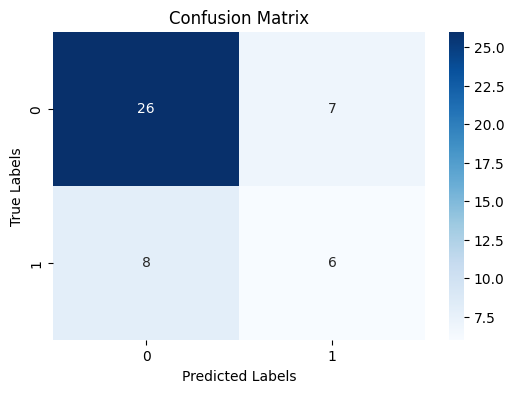

Confusion Matrix:
[[26  7]
 [ 8  6]]


In [ ]:
threshold = 0.5
pred = model.predict([audio_test,video_test,text_test])
thresholded_pred = Thresholding(pred, threshold)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(Ytest, thresholded_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Print the raw confusion matrix
print("Confusion Matrix:")
print(cf_matrix)

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(Ytest, thresholded_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        33
         1.0       0.46      0.43      0.44        14

    accuracy                           0.68        47
   macro avg       0.61      0.61      0.61        47
weighted avg       0.67      0.68      0.68        47

